We will start by downloading 20-newsgroup text dataset:

```http://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset```

In [1]:
import glob
import pandas as pd
import spacy
import string
from sklearn.model_selection import train_test_split
import ast
import random
import torch
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm_notebook

In [2]:
'''
Only lowercase preprocessing
'''
# tokenizer = spacy.load('en_core_web_sm')
# punctuations = string.punctuation
# # lowercase and remove punctuation
# def tokenize(sent):
#     tokens = tokenizer(sent)
#     return [token.text.lower() for token in tokens if (token.text not in punctuations)]
# def tokenize_data(mode, pn):
#     if pn == "neg":
#         label = 0
#     else:
#         label = 1
#     token_train = pd.DataFrame(columns = ["label", "content"])
#     for file in glob.glob("{0}/{1}/*".format(mode, pn)):
#         with open (file, 'r') as f:
#             content = []
#             for line in f:
#                 content += tokenize(line)
#             token_train = token_train.append({"label": label, "content": content}, ignore_index=True)  
#     return token_train
# # neg_train = tokenize_data('train', 'neg')
# # pos_train = tokenize_data('train', 'pos')
# # neg_test = tokenize_data('test', 'neg')
# # pos_test = tokenize_data('test', 'pos')

'\nOnly lowercase\n'

In [3]:
'''
move stop words and useless token preprocessing 
'''
# tokenizer = spacy.load('en_core_web_sm')
# stop_words = set(stopwords.words('english')) 
# stop_words.update(['\'s', '\'t'])
# punctuations = string.punctuation
# # lowercase and remove punctuation
# def tokenize(sent):
#     tokens = tokenizer(sent)
#     return [token.text.lower() for token in tokens if (token.text not in punctuations)]
# def tokenize_data(mode, pn):
#     if pn == "neg":
#         label = 0
#     else:
#         label = 1
#     token_train = pd.DataFrame(columns = ["label", "content"])
#     for file in tqdm_notebook(glob.glob("{0}/{1}/*".format(mode, pn))):
#         with open (file, 'r') as f:
#             content = []
#             for line in f:
#                 new_line = re.sub(r'<br />', '', line)
#                 tokens = tokenize(new_line)
#                 tokens = [w for w in tokens if not w in stop_words] 
#                 content += tokens
#             token_train = token_train.append({"label": label, "content": content}, ignore_index=True)  
#     return token_train
# neg_train = tokenize_data('train', 'neg')
# pos_train = tokenize_data('train', 'pos')
# neg_test = tokenize_data('test', 'neg')
# pos_test = tokenize_data('test', 'pos')

'\nmove stop words and useless token\n'

In [4]:
'''
Save the data
'''
# total_data = pd.concat([neg_train, pos_train])
# total_data['index'] = range(len(total_data))
# total_data = total_data.set_index('index')
# train_split = 0.2
# train_data, val_data = train_test_split(total_data, test_size = train_split, random_state=42)
# train_data.to_csv("new_train.csv")
# val_data.to_csv("new_val.csv")
# test_data = pd.concat([neg_test, pos_test])
# test_data['index'] = range(len(test_data))
# test_data = test_data.set_index('index')
# test_data.to_csv("new_test.csv")
# train_data = pd.read_csv("new_train.csv")
# val_data = pd.read_csv("new_val.csv")
# test_data = pd.read_csv("new_test.csv")

'\nSave the data\n'

In [5]:
# total_data = pd.concat([neg_train, pos_train])
# total_data['index'] = range(len(total_data))
# total_data = total_data.set_index('index')
# train_split = 0.2
# train_data, val_data = train_test_split(total_data, test_size = train_split, random_state=42)
# train_data.to_csv("new_train_sche.csv")
# val_data.to_csv("new_val_sche.csv")
# test_data = pd.concat([neg_test, pos_test])
# test_data['index'] = range(len(test_data))
# test_data = test_data.set_index('index')
# test_data.to_csv("new_test_sche.csv")
train_data = pd.read_csv("new_train.csv")
val_data = pd.read_csv("new_val.csv")
test_data = pd.read_csv("new_test.csv")

# train_data = pd.read_csv("new_train_sche.csv")
# val_data= pd.read_csv("new_val_sche.csv")
# test_data = pd.read_csv("new_test_sche.csv")

In [6]:
# Split train data into actual train and validation sets
# train_data = pd.read_csv("new_train.csv")
# val_data = pd.read_csv("new_val.csv")
# test_data = pd.read_csv("new_test.csv")
print ("Train dataset size is {}".format(len(train_data)))
print ("Val dataset size is {}".format(len(val_data)))
print ("Test dataset size is {}".format(len(test_data)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [7]:
###N-gram 
def ngrams(data, n):
    output = []
    for i in range(len(data)-n+1):
        output.append(data[i:i+n])
    return output

In [8]:
def ngrams_result(dataset, n):
    token_dataset = []
    all_token = []
    for i in dataset.index:
        gram_result = []
        for j in range(n):
            n_gram_result = ngrams(ast.literal_eval(dataset.content[i]), j+1)
            gram_result += [" ".join(n)for n in n_gram_result]
        token_dataset.append(gram_result)
        all_token += gram_result
    return token_dataset, all_token

train_data['ngram'], all_token = ngrams_result(train_data, 1)
val_data['ngram'], _= ngrams_result(val_data, 1)
test_data['ngram'], _ = ngrams_result(test_data, 1)

In [ ]:
train_data['ngram'][0]

Now, we are going to create the vocabulary of most common 10,000 tokens in the training set.

In [9]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_token)

In [10]:
# Lets check the dictionary by loading random token from it

random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))
len(id2token)

Token id 2797 ; token sandler
Token sandler; token id 2797


10002

In [11]:
# convert token to id in the dataset
def token2index_dataset(dataset):
    indices_data = []
    for i in dataset.index:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in dataset.ngram[i]]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data)
train_data['indices'] = train_data_indices

val_data_indices = token2index_dataset(val_data)
val_data['indices'] = val_data_indices

test_data_indices = token2index_dataset(test_data)
test_data['indices'] = test_data_indices
# val_data_indices = token2index_dataset(val_data_tokens)
# test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))
# train_data.to_csv("ngram_train.csv")
# val_data.to_csv("n_gram_val.csv")
# test_data.to_csv("n_gram_test.csv")

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


Now we are going to create PyTorch DataLoader 

In [12]:
MAX_SENTENCE_LENGTH = 400

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data.indices, train_data.label)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data.indices, val_data.label)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data.indices, test_data.label)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)


Here we will define Bag-of-Words model in PyTorch

In [23]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,2)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

In [126]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)
learning_rate = 0.1
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        ##check if the prediction is correct and get the data
        print(data[0], predicted[0], labels.view_as(predicted)[0])
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)



'''
validation vector for new scheme
'''
#validation_acc_sche = []
#validation_acc = []

'''
validation vector for grams 
'''
#uni_gram_acc = []
#bi_gram_acc = []
#tri_gram_acc = []
#four_gram_acc = []

'''
validatoin vector for vocabulary size
'''
#max_5000 = []
#max_10000 = uni_gram_acc
#max_20000 = []
#max_40000 = []

'''
embedding_size
'''
#embed_50 = []
#embed_100 = []
#embed_150 = []
#embed_200 = []


'''
Optimizer
'''
#sgd_acc = []
#adam_acc = []

'''
Learning Rate
'''
#lr_001 = []
#lr_0001 = []
#lr_00005 = []

'''
Learning Rate Linear Decay
'''
lr_decay = []
iterations = 0
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        if i > 0 and i % 50 == 0:
            iterations += i
            learning_rate = (0.1)/(1 + 0.01*iterations)
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            lr_decay.append(val_acc)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    

Epoch: [1/10], Step: [101/625], Validation Acc: 83.58
Epoch: [1/10], Step: [201/625], Validation Acc: 85.72
Epoch: [1/10], Step: [301/625], Validation Acc: 86.52
Epoch: [1/10], Step: [401/625], Validation Acc: 87.26
Epoch: [1/10], Step: [501/625], Validation Acc: 87.84
Epoch: [1/10], Step: [601/625], Validation Acc: 87.9
Epoch: [2/10], Step: [101/625], Validation Acc: 88.14
Epoch: [2/10], Step: [201/625], Validation Acc: 88.08
Epoch: [2/10], Step: [301/625], Validation Acc: 88.22
Epoch: [2/10], Step: [401/625], Validation Acc: 88.08
Epoch: [2/10], Step: [501/625], Validation Acc: 88.36
Epoch: [2/10], Step: [601/625], Validation Acc: 88.32
Epoch: [3/10], Step: [101/625], Validation Acc: 88.5
Epoch: [3/10], Step: [201/625], Validation Acc: 88.44
Epoch: [3/10], Step: [301/625], Validation Acc: 88.42
Epoch: [3/10], Step: [401/625], Validation Acc: 88.5
Epoch: [3/10], Step: [501/625], Validation Acc: 88.62
Epoch: [3/10], Step: [601/625], Validation Acc: 88.6
Epoch: [4/10], Step: [101/625], 

In [153]:
print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
#print ("Test Acc {}".format(test_model(test_loader, model)))

After training for 10 epochs
tensor([  50,    4, 1017,  141,   15,   11,   19,   95,   11,    3,   89,  104,
           5,   96, 4922,  137,   30, 5483, 8737,   22,   91,   25,    6,   97,
           4,   19,  425,  196,   39,    8,   20,  253,  124,  308,  196,   42,
          83,    1,    6,   97, 2500,  455,   15,    2,  194,   12,  139,   88,
         669,   39, 5036, 3899,    3,    1,    1,    1,   71, 1072, 1069,    9,
           4,   21,    1,    5,  103, 1525,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

           0,    0,    0,    0]) tensor([0]) tensor([0])
tensor([  11,   21,    7,   31,    5,    2,   55,    1,  321,    3,  430,  112,
           5,   11,   61,    9,    2,  398, 4682,   13,  160,    2,    1, 2213,
          15,    1,    8,   13,    2,   66,    5,    4,  184,  306,  240,  741,
           6,  158,  769,    3,  231,   41,   99,    6,    2,  357,    5,    2,
         992,   35,  758,   41,  631,   16,    4, 7171,    6,   82, 3766,   14,
           1, 3039,  288,    2,  184,    3,  306, 4022, 1683,   36,  863,   75,
           4, 1023,   76,  290,   18,   41,  236, 4022, 1132,    6,  158,  769,
           3,  162,   41,   99,   58,    2,  992,  278,   35, 2604,   18,   33,
           2,  339, 3039,   75,   37, 1326,  236,   16,  115,    4,  563,  240,
          36, 1043,  339,   16,   31,   61, 1994,  959,  103, 1450,  981,  101,
         378,  101,   16,   49,   34,   71,    1, 4022, 1683,    7,    4,  240,
          36,   75,   24,   29,  119,   22,   41,  334,   44,  

           0,    0,    0,    0]) tensor([1]) tensor([1])
tensor([   1,    7,    4,  612,  167,   32,    2, 3857,    5, 1825,   58,  102,
         707,    9,    2, 3892,    3, 1076,    2, 1522,  380, 1257,   12, 8463,
           8,    1,   13,  707,  216,   32,    1,  303,    2,   19, 1704,   58,
          76,  429, 1826,   14, 5499,  753,    5, 1522, 6176,    7,   16, 3445,
         509,   16,    8,   15, 2768,  155,  607,    3, 6898, 2732,    3,    1,
           1, 1000,    1,  383,   93,  484,    4,  461,  184,  178,   12,   13,
          76,  282, 8514,   14,  106,   21, 1166,  703, 2932, 2727,  528,   16,
          34,  836,  147,    4,    1, 2102,    5,  380,    3, 1686,    3, 3980,
           5,  806,    2, 2640, 1148,   70,  510,    9,    3,   48,    5,  387,
           3,   70, 3751,   32, 4719,    1,   42,   48,   22,    2,  921, 5648,
          26,   34,  345,   87, 4056,    1,    7,    4,    1, 1045,   42,  419,
        6702,   14,  719,  244,   77,    1,  101,    2,   21,  

           0,    0,    0,    0]) tensor([1]) tensor([0])
tensor([ 105,  319,   11,   21,   17,    2, 4512,   61,  163,   10,  107,    8,
           7,  219, 1787,   13,  249,   21, 2827, 1823,  119,    7,  349,    9,
        2140,    6,   11,   10,  209,  135,   32,    2,  133,   56,    1,  212,
        1412,    5,    2, 1977,    8,    7,   40,  164,    2, 1127,    7,  269,
           6,   28,    3,   10,   39,    8,   56,   27,    1,  297,  127,   11,
          21,  137,   65,   30,  802,   49,  131,    4,  276, 1787, 2797,    1,
          14,  106,  108,   26,  349,    9, 2140,    6,   28,  164,  112,   39,
           2,    1,   64,   47,    2,  173,   84,    9,    8,  809, 8411,   36,
           7,   31,    5,    2,    1,  264,    6,  512,    2, 2415,    1,   14,
         281,   21,  572, 1129,    3,    4,  538,   66,  346,    3, 1009,    6,
          30,    9,    2, 1469, 1342,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  

tensor([   2,  240,    9,  321,    7,  772,    9,   33, 1382,    8,   13,  640,
        2780,    3,   40,  814,   12,   23,   62,  165,   69,    8, 1449,    9,
         148,  116,   10,   92,  214,   11,   22,    2,  237,  145,    9, 5241,
           3,   18,   33,    2, 2801,  127,    3,    2, 6635,  657,   58,    8,
          15,  243,    2,   94,  934,  589,    5,   63,  421,  116,   10, 1295,
           6,   82, 1052,    5,    4, 1034,    3,  163,   10,   97,  251,    6,
         708,    8,   48,  175, 2158,    3,  125,    8,  102, 6132,  221, 1055,
          36,   29,   60,  329,   50,   34,  191,    9,   17,    3,   33,   10,
          62,   46,    7,  459,   18,    1,   16,   17,    2,    1,   14,  381,
         514,   48,   18,    4,  184, 2404,  752, 1492,    1,   36,    7, 4936,
          35,   28, 5276,    6,  140,    6,    2, 2324,  470,    5,    1,    1,
           6, 4226,    2, 7432,    5,    4, 1033, 5282, 8531, 2482, 2748,    1,
         100,   14,  281,   21,  514,  1

In [ ]:
#Scheme choose
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(validation_acc))], validation_acc, label = "lower case only")
plt.plot([i+1 for i in range(len(validation_acc_sche))], validation_acc_sche, label = "lower case + remove stopwords & special token")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

In [ ]:
##Gram choose  
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(uni_gram_acc))], uni_gram_acc, label = "Unit gram")
plt.plot([i+1 for i in range(len(bi_gram_acc))], bi_gram_acc, label = "2 gram")
plt.plot([i+1 for i in range(len(tri_gram_acc))], tri_gram_acc, label = "3 gram")
plt.plot([i+1 for i in range(len(four_gram_acc))], four_gram_acc, label = "4 gram")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

In [ ]:
##Vocabular size 
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(max_5000))], max_5000, label = "5000 Vocabulary")
plt.plot([i+1 for i in range(len(max_10000))], max_10000, label = "10000 Vocabulary")
plt.plot([i+1 for i in range(len(max_20000))], max_20000, label = "20000 Vocabulary")
plt.plot([i+1 for i in range(len(max_40000))], max_40000, label = "40000 Vocabulary")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

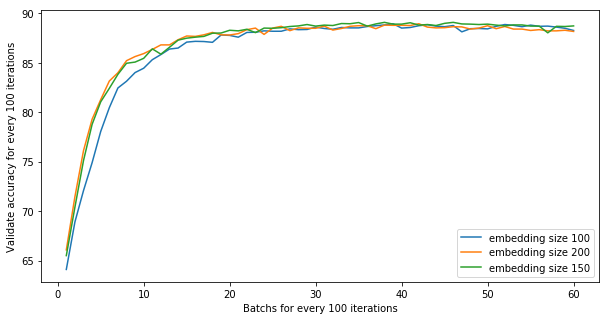

In [76]:
##Embedding size 
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(embed_100))], embed_100, label = "embedding size 100")
plt.plot([i+1 for i in range(len(embed_200))], embed_200, label = "embedding size 200")
plt.plot([i+1 for i in range(len(embed_150))], embed_150, label = "embedding size 150")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

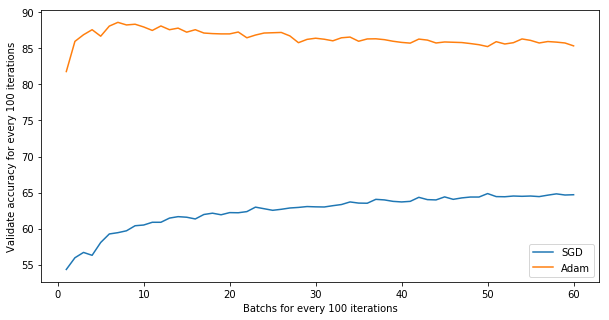

In [32]:
##Optimizaer
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(sgd_acc))], sgd_acc, label = "SGD")
plt.plot([i+1 for i in range(len(adam_acc))], adam_acc, label = "Adam")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

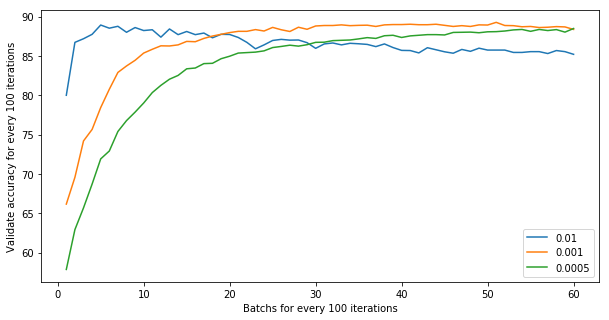

In [41]:
##Learning Rate
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(lr_001))], lr_001, label = "0.01")
plt.plot([i+1 for i in range(len(lr_0001))], lr_0001, label = "0.001")
plt.plot([i+1 for i in range(len(lr_00005))], lr_00005, label = "0.0005")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

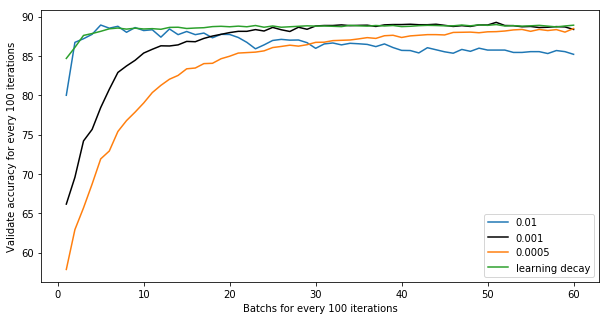

In [93]:
##Learning rate decay
plt.figure(figsize=(10,5))
plt.plot([i+1 for i in range(len(lr_001))], lr_001, label = "0.01")
plt.plot([i+1 for i in range(len(lr_0001))], lr_0001, label = "0.001", color = "black")
plt.plot([i+1 for i in range(len(lr_00005))], lr_00005, label = "0.0005")
plt.plot([i+1 for i in range(len(lr_decay))], lr_decay, label = "learning decay")
plt.xlabel("Batchs for every 100 iterations")
plt.ylabel("Validate accuracy for every 100 iterations")
plt.legend()
plt.show()

In [137]:
"""Convert token to id"""
new_dict = dict((v,k) for k,v in token2id.items())

In [172]:
"""
map id to token

data is in the fail_correct_data.py
"""
new = []
for i in fail1:
    new += [new_dict[i]]
print(" ".join(new), '\n')


new = []
for i in fail2:
    new += [new_dict[i]]
print(" ".join(new), '\n')

new = []
for i in fail3:
    new += [new_dict[i]]
print(" ".join(new), '\n')

new = []
for i in correct1:
    new += [new_dict[i]]
print(" ".join(new) + '\n')

new = []
for i in correct2:
    new += [new_dict[i]]
print(" ".join(new), '\n')

new = []
for i in correct3:
    new += [new_dict[i]]
print(" ".join(new))

it 's the <unk> starring reed hadley with an all star guest cast the film begins with an accidental convenient kidnapping which leads to one thing and another which does n't really indicate the main story which is a big house <unk> prison break story the story is very improbable to say the least it 's like a tv show only more violent for the <unk> /><br />but the cast is a trip picture this ralph <unk> is sent to prison his cell mates are the following criminals <unk> crawford <unk> <unk> jr. charles bronson reading a muscle magazine and william <unk> reading a detective magazine honest you should know that an early scene reveals what happens to the missing boy <unk> the ending <unk> if you do n't want to have that hanging do n't miss the opening scenes between the <unk> and the boy peter <unk> doing well as a runaway <unk> br /><br big house <unk> 1955 howard w. <unk> <unk> crawford ralph <unk> reed hadley <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <